# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [186]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests 
import time
from scipy.stats import linregress
import scipy.stats as stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [187]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [188]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
response = requests.get(url + "&q=" + city).json()
response

{'coord': {'lon': -155.09, 'lat': 19.73},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 77.2,
  'feels_like': 75.85,
  'temp_min': 72,
  'temp_max': 82.4,
  'pressure': 1019,
  'humidity': 65},
 'visibility': 16093,
 'wind': {'speed': 11.41, 'deg': 90},
 'clouds': {'all': 75},
 'dt': 1591496166,
 'sys': {'type': 1,
  'id': 7881,
  'country': 'US',
  'sunrise': 1591458052,
  'sunset': 1591505867},
 'timezone': -36000,
 'id': 5855927,
 'name': 'Hilo',
 'cod': 200}

In [189]:
#Saving cities information from Api
print("Beginning Data Retrieval")
print("---------------------------")
Record=1
Set=1
city_ = []
lat = []
lng= []
Max_temp = []
hum = []
cld= []
wnd_speed=[]
country= []
date= []

for city in cities:
    
    print(f"Processing Record {Record} of Set {Set} | {city}")
    try:
        response = requests.get(url+"&q="+ city).json()
        city_.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        Max_temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cld.append(response['clouds']['all'])
        wnd_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except:
        print(f"City not found. Skipping...")
        pass
    if Record<51:
        Record=Record+1
    if Record==51:
        Record=1
        Set=Set+1
print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")




Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | manali
Processing Record 9 of Set 1 | faanui
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | atar
Processing Record 12 of Set 1 | cumra
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | lao cai
Processing Record 16 of Set 1 | broome
Processing Record 17 of Set 1 | bubaque
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | pevek
Processing Record 20 of Set 1 | aberdeen
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | matagami
Processing Recor

Processing Record 38 of Set 4 | tasiilaq
Processing Record 39 of Set 4 | karlshamn
Processing Record 40 of Set 4 | dalvik
Processing Record 41 of Set 4 | lagoa
Processing Record 42 of Set 4 | aklavik
Processing Record 43 of Set 4 | te anau
Processing Record 44 of Set 4 | mbuguni
Processing Record 45 of Set 4 | kerki
City not found. Skipping...
Processing Record 46 of Set 4 | dwarka
Processing Record 47 of Set 4 | bay city
Processing Record 48 of Set 4 | matamoros
Processing Record 49 of Set 4 | luderitz
Processing Record 50 of Set 4 | severo-kurilsk
Processing Record 1 of Set 5 | ancud
Processing Record 2 of Set 5 | bethel
Processing Record 3 of Set 5 | werota
Processing Record 4 of Set 5 | mayo
Processing Record 5 of Set 5 | ostrovnoy
Processing Record 6 of Set 5 | lezajsk
Processing Record 7 of Set 5 | sucua
Processing Record 8 of Set 5 | chapais
Processing Record 9 of Set 5 | tahoua
Processing Record 10 of Set 5 | les cayes
Processing Record 11 of Set 5 | sept-iles
Processing Record

Processing Record 30 of Set 8 | ust-ishim
Processing Record 31 of Set 8 | northam
Processing Record 32 of Set 8 | torbay
Processing Record 33 of Set 8 | royan
Processing Record 34 of Set 8 | huicheng
Processing Record 35 of Set 8 | anadyr
Processing Record 36 of Set 8 | ilembula
Processing Record 37 of Set 8 | douentza
Processing Record 38 of Set 8 | pangai
Processing Record 39 of Set 8 | nova borova
Processing Record 40 of Set 8 | traralgon
Processing Record 41 of Set 8 | huangmei
Processing Record 42 of Set 8 | esil
Processing Record 43 of Set 8 | marienburg
Processing Record 44 of Set 8 | zolotinka
City not found. Skipping...
Processing Record 45 of Set 8 | ranau
Processing Record 46 of Set 8 | moen
Processing Record 47 of Set 8 | kozhva
Processing Record 48 of Set 8 | leningradskiy
Processing Record 49 of Set 8 | straumen
Processing Record 50 of Set 8 | davila
Processing Record 1 of Set 9 | ewa beach
Processing Record 2 of Set 9 | fort nelson
Processing Record 3 of Set 9 | la prima

Processing Record 15 of Set 12 | montepuez
Processing Record 16 of Set 12 | sambava
Processing Record 17 of Set 12 | champerico
Processing Record 18 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 19 of Set 12 | doha
Processing Record 20 of Set 12 | ibotirama
Processing Record 21 of Set 12 | wilmington
Processing Record 22 of Set 12 | prince rupert
Processing Record 23 of Set 12 | birobidzhan
Processing Record 24 of Set 12 | khonuu
City not found. Skipping...
Processing Record 25 of Set 12 | jalalpur pirwala
Processing Record 26 of Set 12 | zirandaro
Processing Record 27 of Set 12 | batemans bay
Processing Record 28 of Set 12 | hendijan
City not found. Skipping...
Processing Record 29 of Set 12 | elko
Processing Record 30 of Set 12 | tarut
Processing Record 31 of Set 12 | hvolsvollur
Processing Record 32 of Set 12 | killarney
Processing Record 33 of Set 12 | alindao
Processing Record 34 of Set 12 | mulchen
Processing Record 35 of Set 12 | south sioux city
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [190]:
city_df = pd.DataFrame(city_)
city_df.columns =["City"]
lat_df = pd.DataFrame(lat)
lat_df.columns = ["Lat"]
lng_df = pd.DataFrame(lng)
lng_df.columns = ["Lng"]
max_df = pd.DataFrame(Max_temp)
max_df.columns = ["Max Temp"]
hum_df = pd.DataFrame(hum)
hum_df.columns = ["Humidity"]
cld_df = pd.DataFrame(cld)
cld_df.columns = ["Cloudiness"]
wind_df = pd.DataFrame(wnd_speed)
wind_df.columns = ["Wind Speed"]
country_df = pd.DataFrame(country)
country_df.columns = ["Country"]
date_df = pd.DataFrame(date)
date_df.columns = ["Date"]

location_cities = city_df.copy() 
location_cities["Lat"] = lat_df["Lat"]
location_cities["Lng"] = lng_df["Lng"]
location_cities["Max Temp"] = max_df["Max Temp"]
location_cities["Humidity"] = hum_df["Humidity"]                                              
location_cities["Cloudiness"] = cld_df["Cloudiness"] 
location_cities["Wind Speed"] = wind_df["Wind Speed"]
location_cities["Country"] = country_df["Country"] 
location_cities["Date"] = date_df["Date"] 
location_cities.head()

        

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,35.60,93,40,10.29,CL,1591495903
1,Rikitea,-23.12,-134.97,73.65,88,100,30.58,PF,1591496167
2,Upernavik,72.79,-56.15,30.42,95,97,12.39,GL,1591496167
3,Jamestown,42.10,-79.24,62.60,59,1,12.75,US,1591496139
4,Nikolskoye,59.70,30.79,54.00,87,0,4.47,RU,1591496167


In [191]:
location_cities.to_csv("Location_cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [192]:
#  Get the indices of cities that have humidity over 100%.
locations_cities = location_cities.loc[(
    location_cities["Humidity"] > 100)]
location_cities.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,35.60,93,40,10.29,CL,1591495903
1,Rikitea,-23.12,-134.97,73.65,88,100,30.58,PF,1591496167
2,Upernavik,72.79,-56.15,30.42,95,97,12.39,GL,1591496167
3,Jamestown,42.10,-79.24,62.60,59,1,12.75,US,1591496139
4,Nikolskoye,59.70,30.79,54.00,87,0,4.47,RU,1591496167


In [193]:
location_cities["City"].value_counts

<bound method IndexOpsMixin.value_counts of 0       Punta Arenas
1            Rikitea
2          Upernavik
3          Jamestown
4         Nikolskoye
           ...      
547          Labuhan
548          Margate
549    Manoel Urbano
550      Bloomington
551             Auki
Name: City, Length: 552, dtype: object>

In [194]:
location_cities.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,20.693786,15.706757,65.892609,70.418478,52.983696,7.942192,1.591496e+09
std,33.792685,92.448561,13.930908,20.819086,39.615183,5.381675,6.588093e+01
min,-54.800000,-179.170000,23.880000,5.000000,0.000000,0.360000,1.591496e+09
25%,-8.122500,-68.352500,55.000000,58.000000,5.000000,3.722500,1.591496e+09
50%,25.945000,20.335000,65.370000,75.000000,62.500000,6.930000,1.591496e+09
75%,50.125000,95.582500,77.000000,87.000000,91.000000,10.695000,1.591496e+09
max,78.220000,179.320000,96.800000,100.000000,100.000000,31.090000,1.591496e+09


In [195]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".




In [196]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

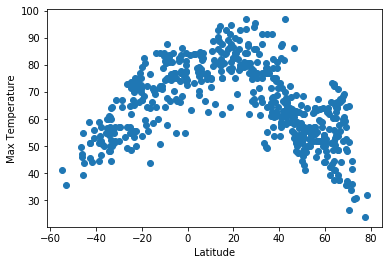

In [197]:
plt.scatter(lat_df,max_df)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

## Latitude vs. Humidity Plot

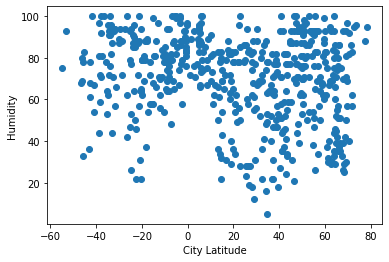

In [198]:
plt.scatter(lat_df,hum_df)
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

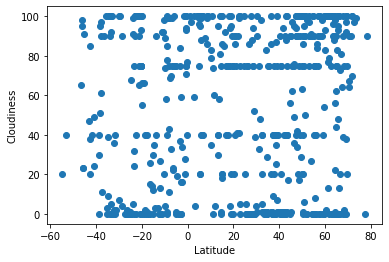

In [199]:
plt.scatter(lat_df,cld_df)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

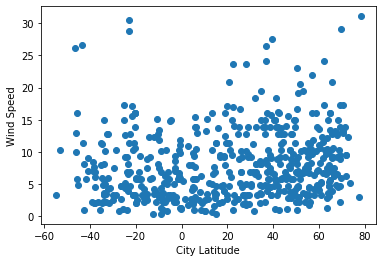

In [200]:
plt.scatter(lat_df,wnd_speed)
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

In [201]:
# OPTIONAL: Create a function to create Linear Regression plots



In [202]:
# Create Northern and Southern Hemisphere DataFrames

southern_location_cities = location_cities.loc[location_cities["Lat"] < 0]
southern_location_cities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,35.60,93,40,10.29,CL,1591495903
1,Rikitea,-23.12,-134.97,73.65,88,100,30.58,PF,1591496167
6,Hithadhoo,-0.60,73.08,84.20,76,94,11.88,MV,1591496168
8,Faanui,-16.48,-151.75,76.78,58,0,4.18,PF,1591496168
9,Ushuaia,-54.80,-68.30,41.00,75,20,3.36,AR,1591496148
...,...,...,...,...,...,...,...,...,...
535,Neiafu,-18.65,-173.98,80.60,88,40,6.93,TO,1591496283
539,Inhambane,-23.86,35.38,67.15,85,5,9.28,MZ,1591496283
547,Labuhan,-6.88,112.21,81.18,79,99,5.12,ID,1591496285
549,Manoel Urbano,-8.84,-69.26,74.98,80,0,0.36,BR,1591496285


In [203]:
# Create Northern and Southern Hemisphere DataFrames

northern_location_cities = location_cities.loc[location_cities["Lat"] > 0]
northern_location_cities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Upernavik,72.79,-56.15,30.42,95,97,12.39,GL,1591496167
3,Jamestown,42.10,-79.24,62.60,59,1,12.75,US,1591496139
4,Nikolskoye,59.70,30.79,54.00,87,0,4.47,RU,1591496167
5,Qaanaaq,77.48,-69.36,23.88,88,0,2.91,GL,1591496167
7,Manali,13.17,80.27,86.00,66,40,10.29,IN,1591496168
...,...,...,...,...,...,...,...,...,...
544,Lahaina,20.88,-156.68,84.20,58,90,11.41,US,1591496186
545,Watrous,51.67,-105.47,55.42,86,100,20.60,CA,1591496284
546,Ordu,40.91,37.68,59.00,100,0,1.12,TR,1591496285
548,Margate,51.38,1.39,48.00,76,50,3.00,GB,1591496285


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.560863653185495


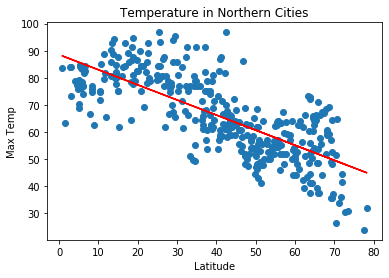

y = -0.56x + 88.52


In [204]:
plt.scatter(northern_location_cities["Lat"], northern_location_cities["Max Temp"], marker="o")

plt.title("Temperature in Northern Cities")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

x_values= northern_location_cities["Lat"]
y_values= northern_location_cities["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.show()
print(line_eq)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5996457030249803


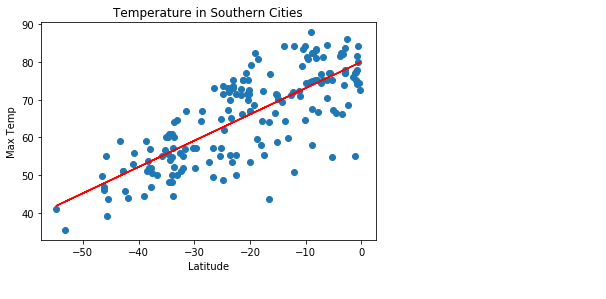

y = 0.69x + 79.97


In [205]:
plt.scatter(southern_location_cities["Lat"], southern_location_cities["Max Temp"], marker="o")

plt.title("Temperature in Southern Cities")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

x_values= southern_location_cities["Lat"]
y_values= southern_location_cities["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.show()
print(line_eq)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0048521614191412085


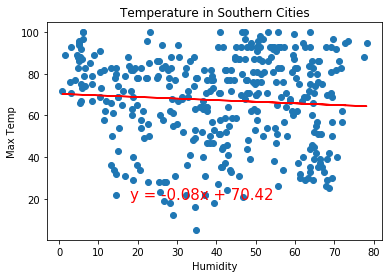

y = -0.08x + 70.42


In [206]:
plt.scatter(northern_location_cities["Lat"], northern_location_cities["Humidity"], marker="o")

plt.title("Temperature in Southern Cities")
plt.xlabel('Humidity')
plt.ylabel('Max Temp')

x_values= northern_location_cities["Lat"]
y_values= northern_location_cities["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.show()
print(line_eq)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01342771443832331


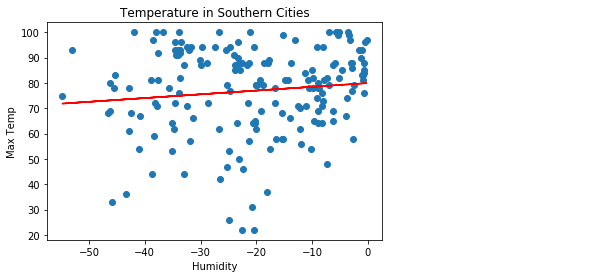

y = 0.15x + 79.94


In [207]:
plt.scatter(southern_location_cities["Lat"], southern_location_cities["Humidity"], marker="o")

plt.title("Temperature in Southern Cities")
plt.xlabel('Humidity')
plt.ylabel('Max Temp')

x_values= southern_location_cities["Lat"]
y_values= southern_location_cities["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.show()
print(line_eq)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0002812766718601819


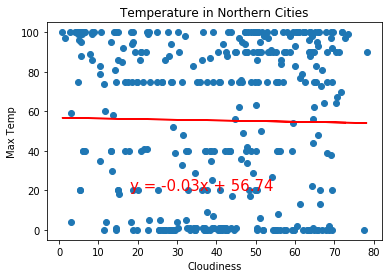

y = -0.03x + 56.74


In [208]:
plt.scatter(northern_location_cities["Lat"], northern_location_cities["Cloudiness"], marker="o")

plt.title("Temperature in Northern Cities")
plt.xlabel('Cloudiness')
plt.ylabel('Max Temp')

x_values= northern_location_cities["Lat"]
y_values= northern_location_cities["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.show()
print(line_eq)


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 8.638044250737598e-05


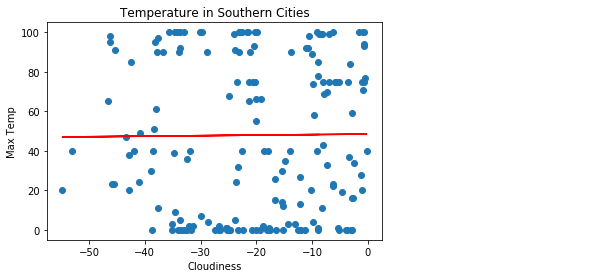

y = 0.03x + 48.5


In [209]:
plt.scatter(southern_location_cities["Lat"], southern_location_cities["Cloudiness"], marker="o")

plt.title("Temperature in Southern Cities")
plt.xlabel('Cloudiness')
plt.ylabel('Max Temp')

x_values= southern_location_cities["Lat"]
y_values= southern_location_cities["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.show()
print(line_eq)


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03350147114929748


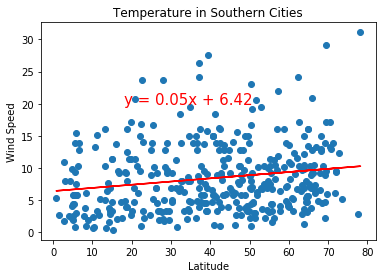

y = 0.05x + 6.42


In [210]:
plt.scatter(northern_location_cities["Lat"], northern_location_cities["Wind Speed"], marker="o")

plt.title("Temperature in Southern Cities")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

x_values= northern_location_cities["Lat"]
y_values= northern_location_cities["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.show()
print(line_eq)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.021592292780256685


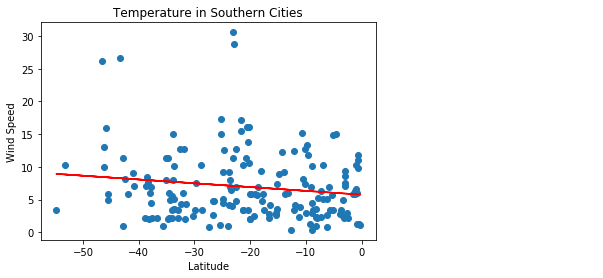

y = -0.06x + 5.74


In [211]:
plt.scatter(southern_location_cities["Lat"], southern_location_cities["Wind Speed"], marker="o")

plt.title("Temperature in Southern Cities")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

x_values= southern_location_cities["Lat"]
y_values= southern_location_cities["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.show()
print(line_eq)